In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn import tree, metrics
from sklearn.preprocessing import LabelEncoder

In /home/shiva/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/shiva/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/shiva/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/shiva/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/shiva/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

In [3]:
mkt_df = pd.read_csv(os.getcwd() + '/bank-full.csv', delimiter=";")

In [4]:
total_calls = sum(mkt_df['campaign'])
total_succ = mkt_df.query('y == "yes"').shape[0]

In [5]:
for i in range(25, 36, 1):
    curr_calls = sum(mkt_df.query('campaign <= {0}'.format(i))['campaign'])
    curr_succ = mkt_df.query('y == "yes" and campaign <= {0}'.format(i)).shape[0]
    print(i, curr_calls/total_calls, curr_succ/total_succ)

25 0.9685729376740613 0.9996218566836831
26 0.9712778898172156 0.9996218566836831
27 0.9734386504049425 0.9996218566836831
28 0.9770239124171708 0.9996218566836831
29 0.9807372195012645 0.9998109283418416
30 0.9826578955792439 0.9998109283418416
31 0.985634943500112 0.9998109283418416
32 0.9879397547936873 1.0
33 0.9895243125580204 1.0
34 0.9908847914465893 1.0
35 0.9920051858254105 1.0


Use maximum nubmer of calls as 34.

In [4]:
max_calls = 34

mkt_df_filtered = mkt_df[(mkt_df['campaign']>=1) & (mkt_df['campaign']<=max_calls)]
mkt_df_filtered = mkt_df_filtered[['job', 'marital', 'education', 'default', 'housing', 'loan', 'age', 'balance', 'campaign', 'y']]

In [7]:
# We use the LabelEncoder from SkLearn to transform the following features.
features_to_transform = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'y']
for feature in features_to_transform:
    le = LabelEncoder()
    le.fit(mkt_df_filtered[feature])
    mkt_df_filtered[feature] = le.transform(mkt_df_filtered[feature])

In [13]:
y = mkt_df_filtered['y']
X = mkt_df_filtered['balance'].to_numpy().reshape(-1, 1)

In [20]:
# crit = 'entropy'
crit = 'gini'

model = tree.DecisionTreeClassifier(criterion= crit, max_depth=5)
model.fit(X, y)

DecisionTreeClassifier(max_depth=5)

[Text(2662.125, 4983.0, 'X[0] <= 798.5\ngini = 0.207\nsamples = 45184\nvalue = [39895, 5289]'),
 Text(1232.25, 4077.0, 'X[0] <= 60.5\ngini = 0.174\nsamples = 28377\nvalue = [25654, 2723]'),
 Text(604.5, 3171.0, 'X[0] <= -46.5\ngini = 0.131\nsamples = 10812\nvalue = [10052, 760]'),
 Text(372.0, 2265.0, 'X[0] <= -167.5\ngini = 0.099\nsamples = 3192\nvalue = [3026, 166]'),
 Text(186.0, 1359.0, 'X[0] <= -192.5\ngini = 0.109\nsamples = 2293\nvalue = [2161, 132]'),
 Text(93.0, 453.0, 'gini = 0.103\nsamples = 2135\nvalue = [2019, 116]'),
 Text(279.0, 453.0, 'gini = 0.182\nsamples = 158\nvalue = [142, 16]'),
 Text(558.0, 1359.0, 'X[0] <= -130.5\ngini = 0.073\nsamples = 899\nvalue = [865, 34]'),
 Text(465.0, 453.0, 'gini = 0.034\nsamples = 229\nvalue = [225, 4]'),
 Text(651.0, 453.0, 'gini = 0.086\nsamples = 670\nvalue = [640, 30]'),
 Text(837.0, 2265.0, 'X[0] <= -45.5\ngini = 0.144\nsamples = 7620\nvalue = [7026, 594]'),
 Text(744.0, 1359.0, 'gini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(

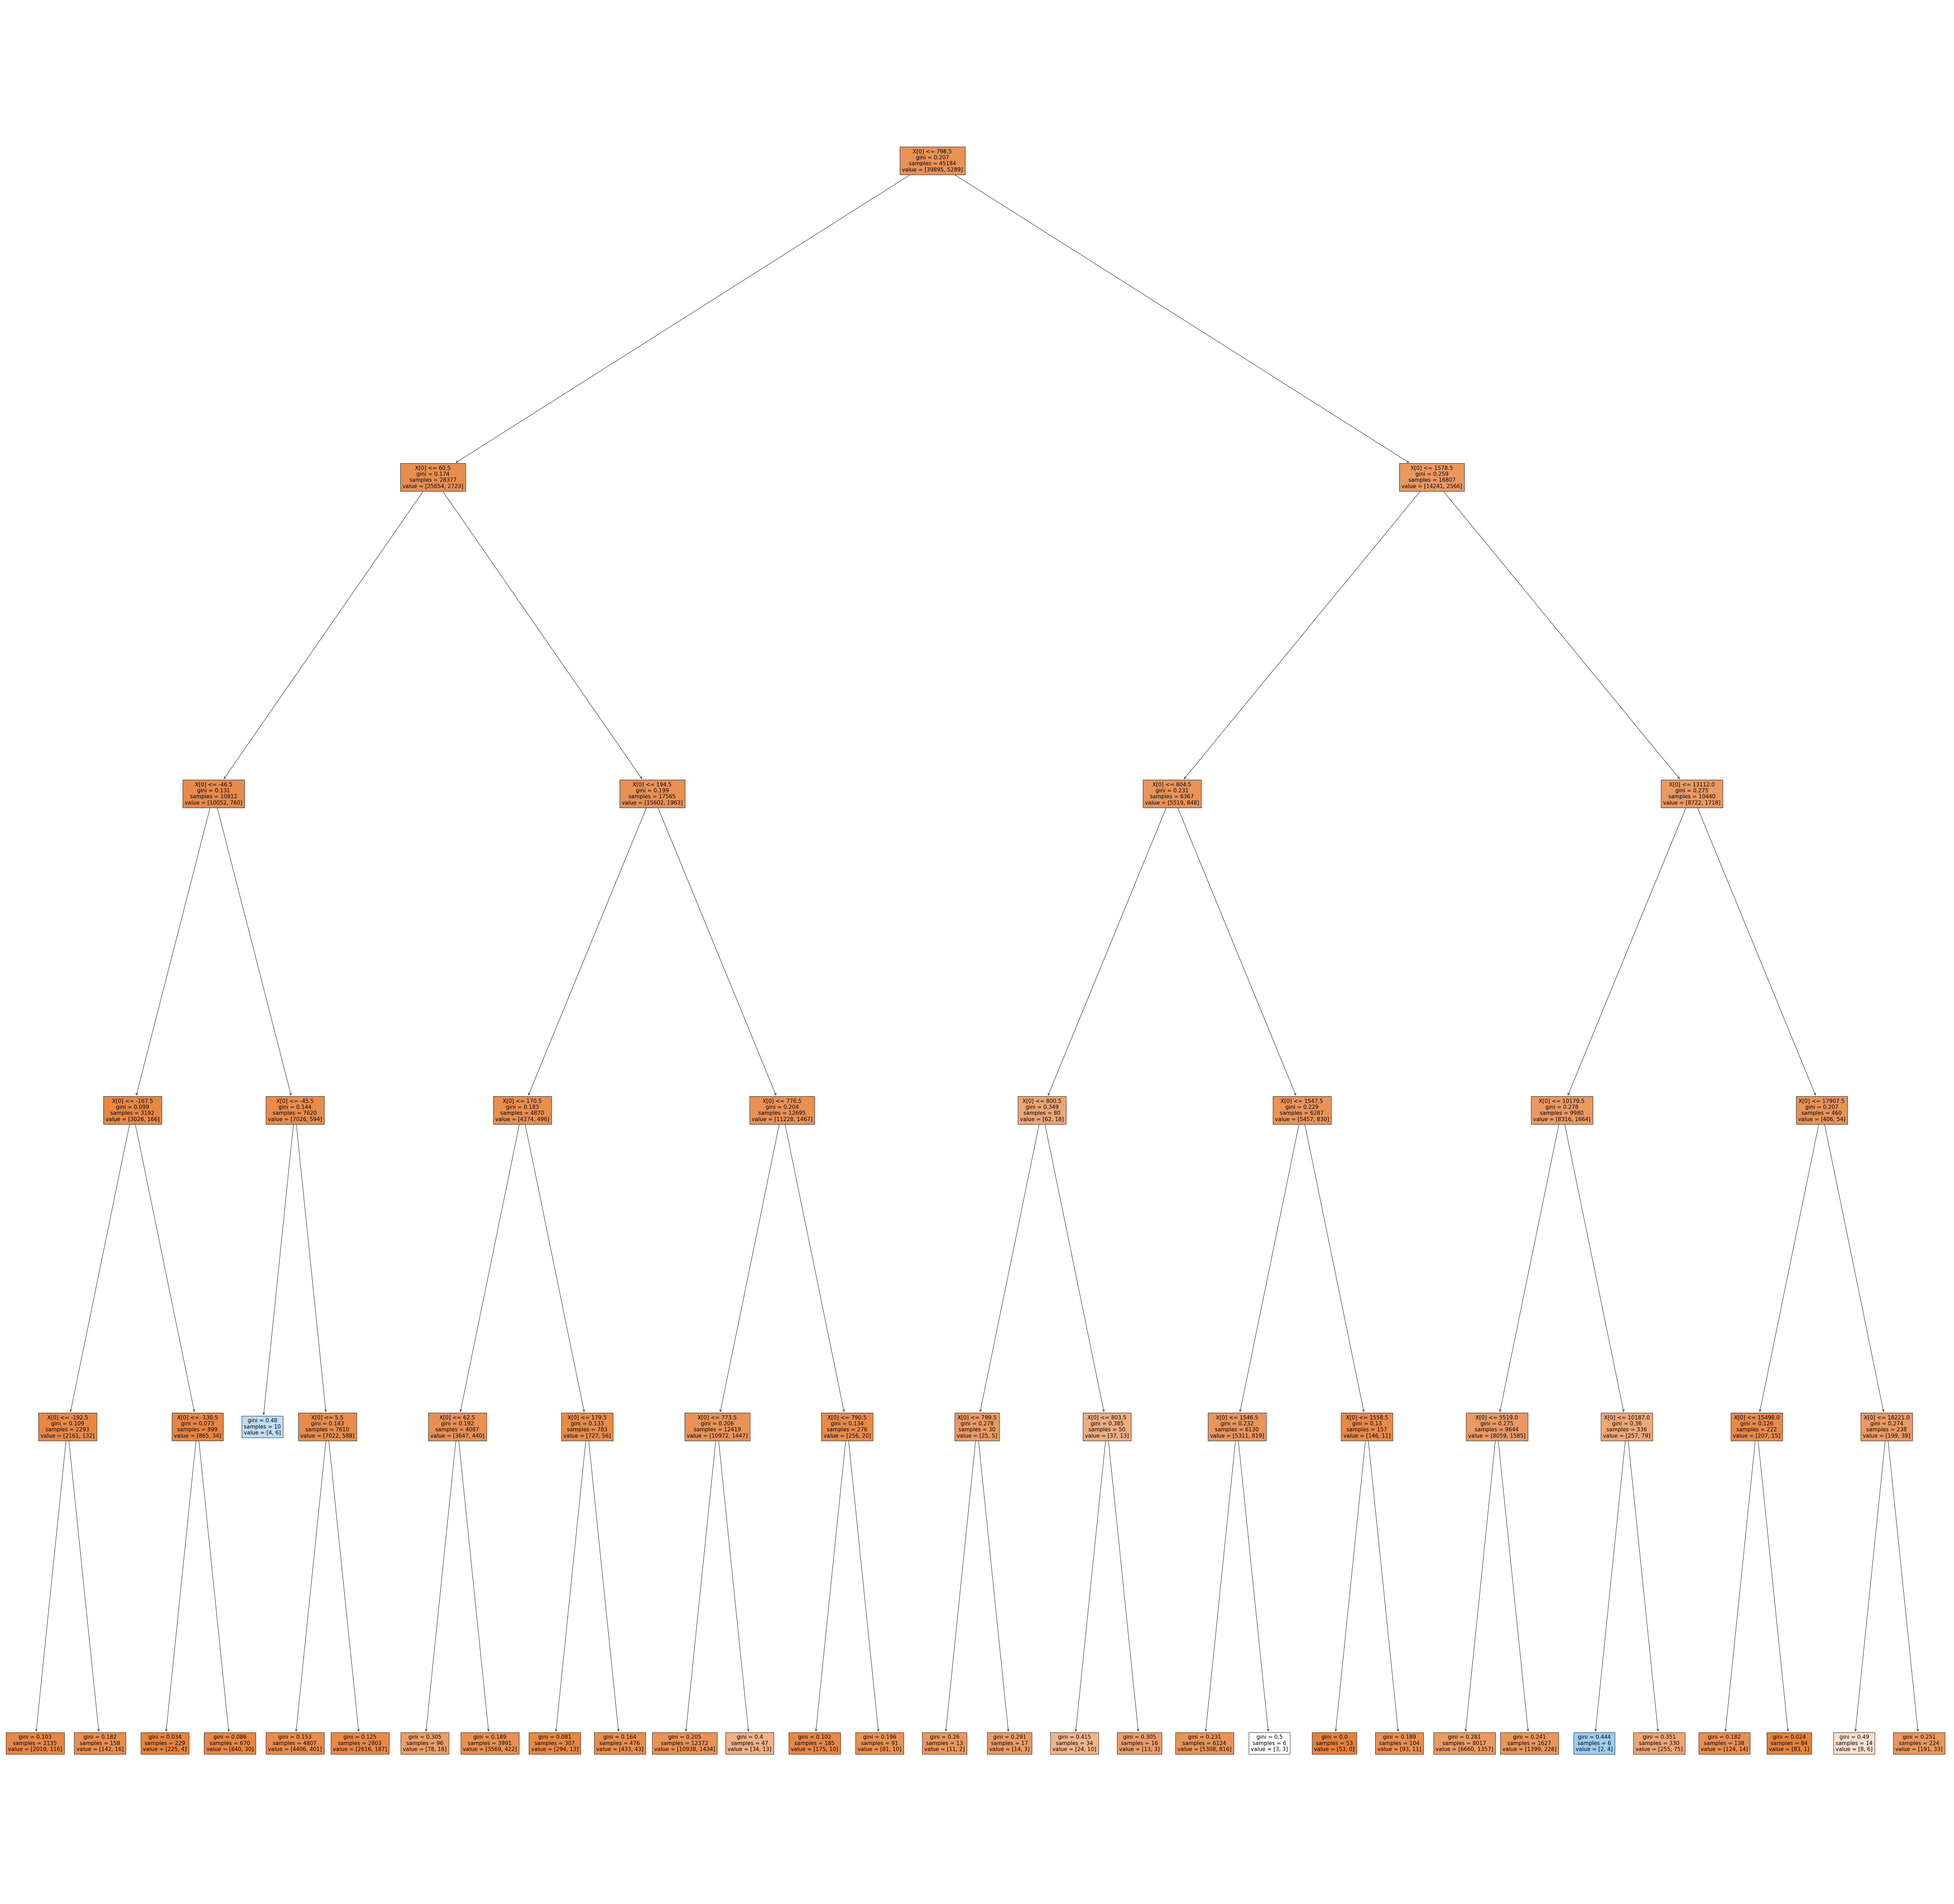

In [21]:
fig, axes = plt.subplots(figsize = (100, 100))
tree.plot_tree(model, filled = True)

In [5]:
mkt_df_filtered.query('y == "yes" & default == "yes"')

,job,marital,education,default,housing,loan,age,balance,campaign,y
1767,blue-collar,married,secondary,yes,yes,no,32,-1,1,yes
2387,services,single,secondary,yes,yes,no,24,-122,1,yes
4897,blue-collar,single,secondary,yes,yes,no,30,239,1,yes
7637,technician,married,secondary,yes,no,no,48,0,1,yes
8218,technician,single,secondary,yes,yes,no,42,-1129,5,yes
8345,management,divorced,tertiary,yes,yes,no,44,-411,4,yes
8442,self-employed,married,secondary,yes,yes,yes,40,-754,3,yes
8570,blue-collar,single,secondary,yes,yes,no,26,-36,2,yes
8817,management,single,tertiary,yes,yes,no,27,-713,2,yes
9144,housemaid,divorced,primary,yes,no,no,56,1238,1,yes
